In [1]:
%matplotlib inline
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import matplotlib.pyplot as plt
import numpy as np

# onehot编码有很多好处
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
x = tf.placeholder(tf.float32, [None,784], name='X')
y = tf.placeholder(tf.float32, [None,10], name='Y')
w = tf.Variable(tf.random_normal([784, 10]), name='W')
b = tf.Variable(tf.zeros([10]),name='b')

# 前向计算
forward = tf.matmul(x,w) + b

# Softmax分类化后作为pred
pred = tf.nn.softmax(forward)

#超参数
train_epochs = 1000
batch_size = 50 #单次训练样本数（批次大小）
total_batch = int(mnist.train.num_examples/batch_size)
display_step = 20 # 显示粒度
learning_rate = 0.01

# 定义交叉熵损失函数
loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))
# 优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)



In [3]:
# 定义准确率
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

 Train epoch =  20  Loss =  0.701972663  Accuracy= 0.8576
 Train epoch =  40  Loss =  0.559820771  Accuracy= 0.8818
 Train epoch =  60  Loss =  0.497593373  Accuracy= 0.8886
 Train epoch =  80  Loss =  0.459969431  Accuracy= 0.8924
 Train epoch =  100  Loss =  0.434849411  Accuracy= 0.8972
 Train epoch =  120  Loss =  0.415152252  Accuracy= 0.8974
 Train epoch =  140  Loss =  0.399727970  Accuracy= 0.8978
 Train epoch =  160  Loss =  0.388220102  Accuracy= 0.8982
 Train epoch =  180  Loss =  0.377194852  Accuracy= 0.9010
 Train epoch =  200  Loss =  0.368979871  Accuracy= 0.9026
 Train epoch =  220  Loss =  0.361168265  Accuracy= 0.9042
 Train epoch =  240  Loss =  0.355299473  Accuracy= 0.9048
 Train epoch =  260  Loss =  0.349122256  Accuracy= 0.9070
 Train epoch =  280  Loss =  0.344606876  Accuracy= 0.9060
 Train epoch =  300  Loss =  0.340614945  Accuracy= 0.9072
 Train epoch =  320  Loss =  0.336034566  Accuracy= 0.9066
 Train epoch =  340  Loss =  0.332670748  Accuracy= 0.9078
 

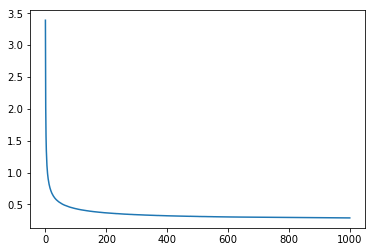

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
loss_list = []

for epoch in range(train_epochs):
    for bacth in range(total_batch): 
        #分批读取数据, next_batch 会对数据集进行shuffle
        xs, ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x:xs, y:ys})
    
    #使用验证集填充，并计算loss & acc
    loss, acc = sess.run([loss_function, accuracy], feed_dict={x:mnist.validation.images, y:mnist.validation.labels})
    loss_list.append(loss)
    
    if (epoch + 1)% display_step == 0:
        print (' Train epoch = ','%02d'%(epoch+1), 
               ' Loss = ', '{:.9f}'.format(loss),
               ' Accuracy=','{:.4f}'.format(acc))

print('Train Finished!!')
plt.plot(loss_list)

In [5]:
# 评估模型
# 测试集
accu_test = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
print("Test Accuracy:", accu_test)

accu_train = sess.run(accuracy, feed_dict={x:mnist.train.images, y:mnist.train.labels})
print("Train Accuracy:", accu_train)

Test Accuracy: 0.9217
Train Accuracy: 0.932782


In [6]:
# 可视化看结果的函数，最多显示25张图
def plot_images_labels_prediction(images,
                                  labels,
                                  prediction,
                                  index, # 从第index个开始显示
                                  num=10):
    fig = plt.gcf()# get current figure
    fig.set_size_inches(10,12) # 当前图像大小为10英寸*12英寸
    if num>25:
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1) # 获取当前要处理的子图
        ax.imshow(np.reshape(images[index],(28,28)),cmap='binary') #指定image reshape
        title = 'label=' + str(np.argmax(labels[index]))
        
        ax.set_title(title,fontsize=10) # 在图上显示预测值
        ax.set_xticks([]) # 为了美观， 不显示x和y轴
        ax.set_xticks([])
        index = index + 1
    plt.show()
    

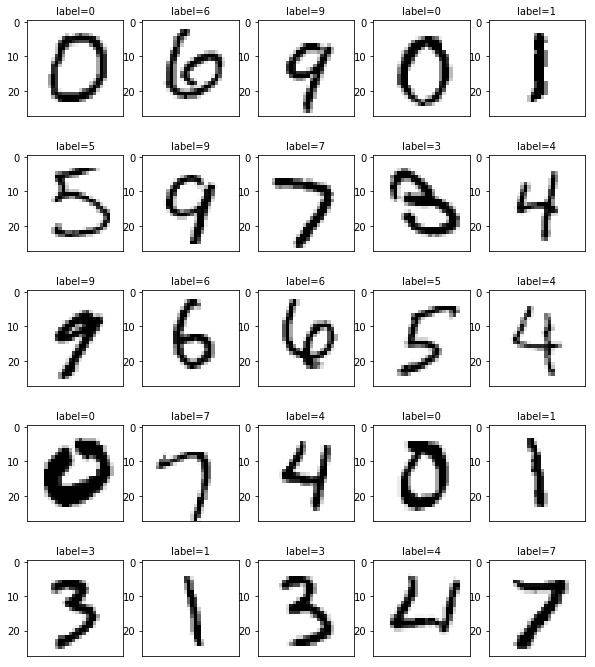

In [7]:

prediction_result = sess.run(tf.argmax(pred, 1), feed_dict={x:mnist.test.images})
#print(prediction_result[0:10])
plot_images_labels_prediction(mnist.test.images,mnist.test.labels,prediction_result,10,25)



In [8]:
w.eval(session = sess)

array([[ 1.31634533,  0.31936461, -0.15631121, ..., -0.60318696,
        -0.51411504, -0.34456044],
       [-0.33311635,  0.69827616, -0.09586048, ..., -1.2011286 ,
         0.96284169,  0.64592898],
       [-1.05996454,  1.20852816, -0.0096075 , ..., -0.04744251,
        -0.54508877, -1.41364181],
       ..., 
       [ 0.42415065,  2.36509728, -0.81851745, ...,  1.2633369 ,
        -1.53467441, -2.09781337],
       [ 0.04510908,  1.26113355, -0.54740047, ...,  0.09285753,
         0.28311133, -0.90361857],
       [-0.40195206,  0.56936634, -1.12205732, ..., -0.16444777,
        -0.29349801,  1.38732302]], dtype=float32)

In [9]:
b.eval(session = sess)

array([-1.54414392,  1.30634272,  0.12633048, -0.60439378,  0.15940462,
        2.38647056, -0.67621976,  1.62569153, -2.29418111, -0.48518813], dtype=float32)

In [10]:
sess.close()